# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Imports-and-settings" data-toc-modified-id="Imports-and-settings-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports and settings</a></div><div class="lev1 toc-item"><a href="#DNN" data-toc-modified-id="DNN-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>DNN</a></div><div class="lev1 toc-item"><a href="#Working-with-time-series" data-toc-modified-id="Working-with-time-series-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Working with time series</a></div>

# Imports and settings

In [51]:
import scipy.stats as st

In [52]:
import numpy as np
import numpy.random as rd
import pandas as pd

In [60]:
import sklearn.datasets as dt

In [42]:
from keras.layers import Convolution1D, Convolution2D, BatchNormalization, Dense, Dropout
from keras.models import Sequential

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(10,10)})
plt.style.use("dark_background")

In [86]:
sns.set_palette('pastel', color_codes=True)

# DNN

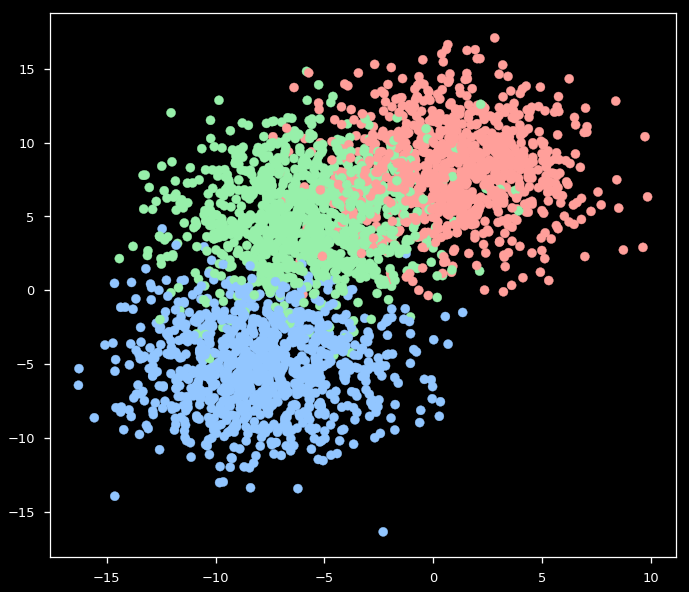

In [147]:
cd = {0:'r',1:'b', 2:'g'}

blob = dt.make_blobs(3000, cluster_std=3)
c = [cd[l] for l in blob[1]]

plt.scatter(blob[0][:,0], blob[0][:,1], c=c)

In [140]:
from keras.utils.np_utils import to_categorical

In [145]:
model = Sequential()
model.add(Dense(10, input_shape=(2,) , activation= 'relu'))
model.add(Dense(5 , activation= 'relu'))
model.add(Dense(3, activation= 'sigmoid'))
model.compile(optimizer='adam', loss='categorical_crossentropy')
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_26 (Dense)             (None, 10)                30        
_________________________________________________________________
dense_27 (Dense)             (None, 5)                 55        
_________________________________________________________________
dense_28 (Dense)             (None, 3)                 18        
Total params: 103
Trainable params: 103
Non-trainable params: 0
_________________________________________________________________


In [161]:
model.fit(blob[0][:2000], to_categorical(blob[1][:2000]), batch_size=3)

Epoch 1/10
2000/2000 [==============================] - 1s - loss: 0.2542     
Epoch 2/10
2000/2000 [==============================] - 0s - loss: 0.2469     
Epoch 3/10
2000/2000 [==============================] - 1s - loss: 0.2478     
Epoch 4/10
2000/2000 [==============================] - 1s - loss: 0.2453     
Epoch 5/10
2000/2000 [==============================] - 0s - loss: 0.2469     
Epoch 6/10
2000/2000 [==============================] - 0s - loss: 0.2452     
Epoch 7/10
2000/2000 [==============================] - 0s - loss: 0.2465     
Epoch 8/10
2000/2000 [==============================] - 1s - loss: 0.2456     
Epoch 9/10
2000/2000 [==============================] - 0s - loss: 0.2444     
Epoch 10/10
2000/2000 [==============================] - 1s - loss: 0.2449     


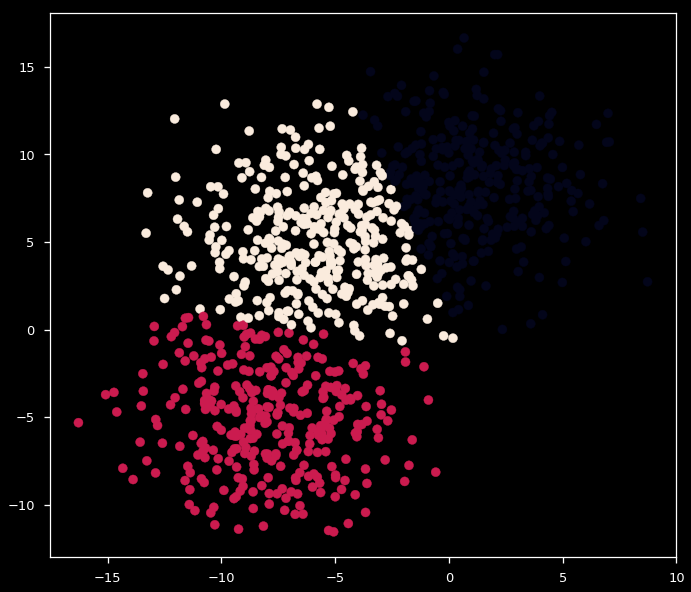

In [162]:
plt.scatter(blob[0][2000:][:,0], blob[0][2000:][:,1], c=model.predict(blob[0][2000:]).argmax(axis=1))

# Working with time series

In [219]:
X, y = dt.make_friedman1(3000)

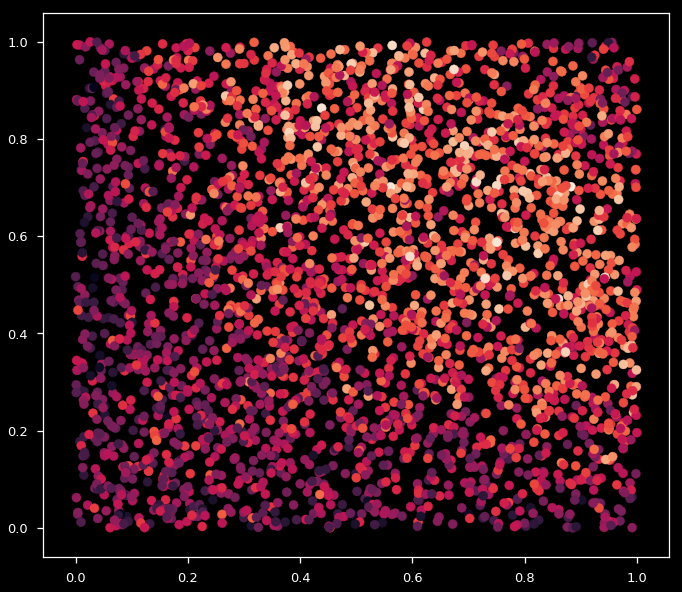

In [221]:
plt.scatter(X[:,0], X[:,1], c=y)